mean :  231.10886025488642
sigma :  317.43941499275496
popt (a x0 sigma) : ( [465.62120826 442.33769357 212.36452209] )
Peak (peak_r peak_I) : ( 442.3376935688599 465.62120826481555 )


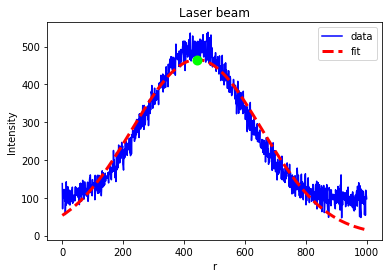

In [1]:
##laser gaussian profile fit, 2021, Ali Bakhshi, https://github.com/bakhshiali/
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

##variance = sigma^2=sum(x-mu)^2/N=cov(x,x), mu = mean 

#load laser profile data I(r)
d=np.loadtxt("outputProfile.o")
x = d[:,0] #r
y = d[:,1] #intensity

mean = sum(x*y)/sum(x)#mu
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
print("mean : ",mean)
print("sigma : ",sigma)

def gaussian(x,a,x0,sigma):#gaussian function returns Intensity(r)
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#fit data (r,I(r)) to gaussian function
popt,pcov = curve_fit(gaussian,x,y)#f(xdata, *popt) - ydata is minimized, covariance of popt
print("popt (a x0 sigma) : (",popt,")")
print("Peak (peak_r peak_I) : (",popt[1],gaussian(popt[1],*popt),")")

#plot data, fit, peak
plt.plot(x,y,'b',label='data',zorder=1)
plt.plot(x,gaussian(x,*popt),'r--',label='fit',linewidth=3,zorder=2)
plt.scatter(popt[1],gaussian(popt[1],*popt), marker='o',color='#00FF00',linewidth=4,zorder=3)
plt.legend()
plt.title('Laser beam')
plt.xlabel('r')
plt.ylabel('Intensity')
plt.show()